# CMOR 350 Final

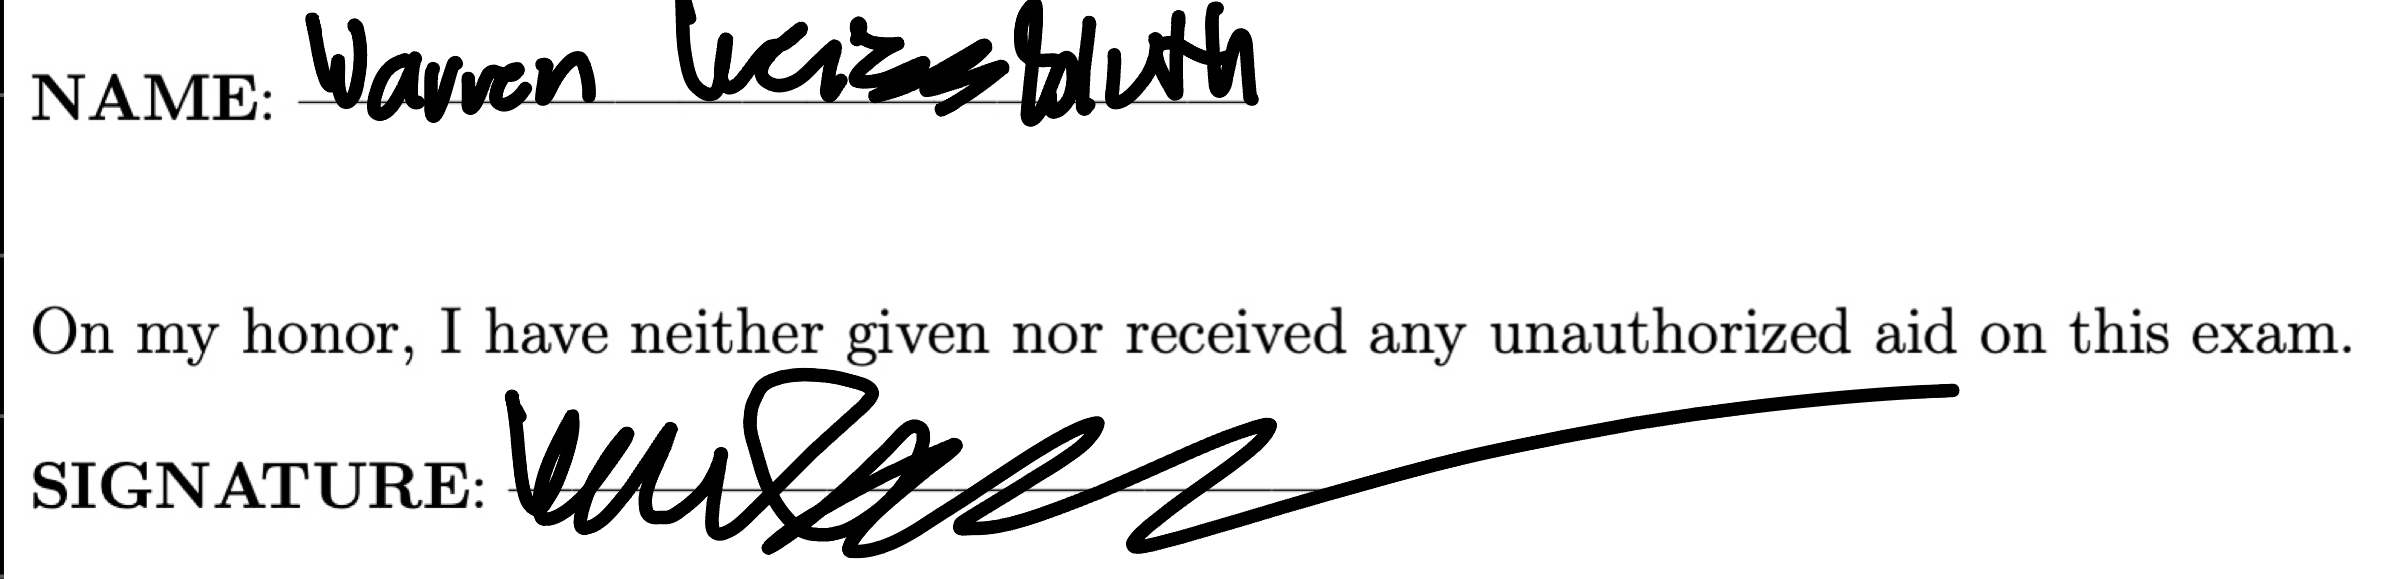

---

## Question 1

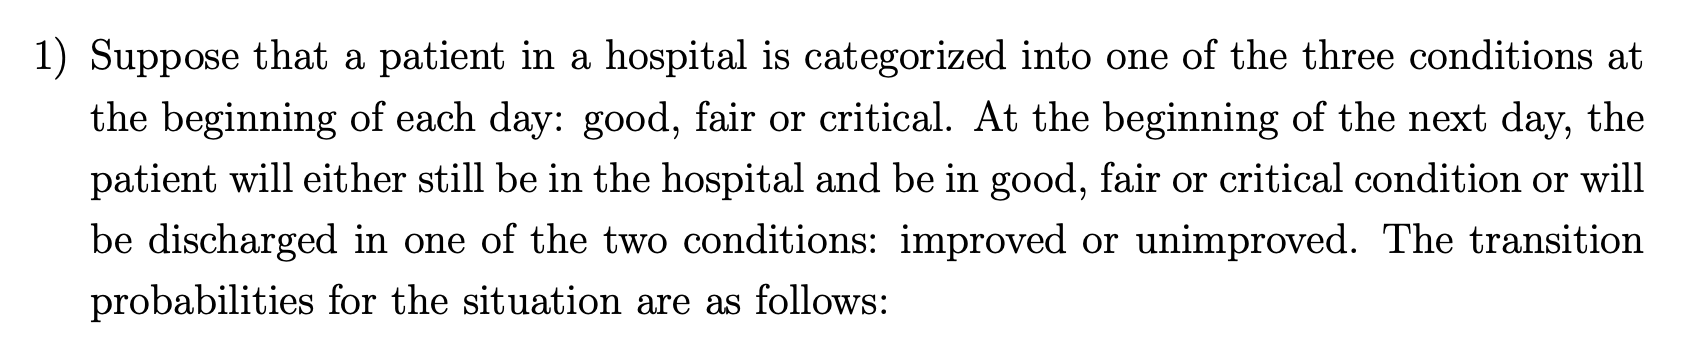

We'll take the given rate matrixes, and define the 5 states:
$$
S=\{1,2,3,4,5\}\\
Where\\
Good \mapsto 1\\
Fair \mapsto 2\\
Critical \mapsto 3\\
Improved \mapsto 4\\
Unimproved \mapsto 5\\
$$

With Rate Matrix
$$
P = \begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}

$$

In [37]:
# there are 5 states of the system
# here's the transition probability matrix
P = [#G = 1, F = 2, C = 3, I = 4, U = 5
    [0.65,0.20,0.05,0.08,0.02], # Good
    [0.50,0.30,0.12,0.05,0.03], # Fair
    [0.51,0.25,0.20,0.02,0.02], # Critical
    [0.00,0.00,0.00,1.00,0.00], # Improved
    [0.00,0.00,0.00,0.00,1.00], # Unimproved
    ]

Let's check to see if all rows add to 1.

In [38]:
import numpy as np
row_sums = np.sum(P, axis=1)
print(row_sums)


[1. 1. 1. 1. 1.]


Ok good. Everything adds to 1. The rate matrix is now valid.

Let's check it against the prompt:

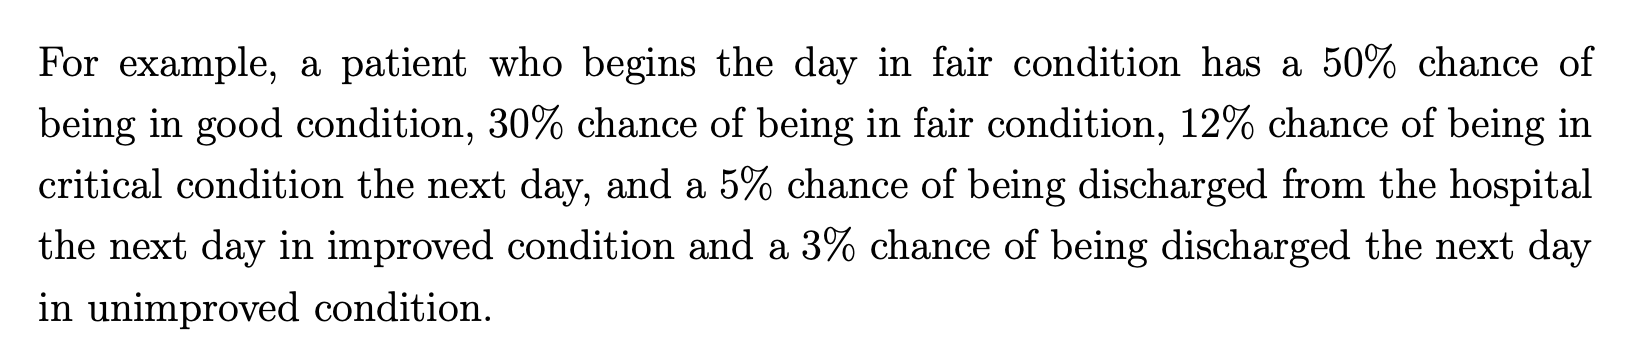](attachment:3.png)

That would be state 2-Fair (index 1):

In [39]:
P[1]

[0.5, 0.3, 0.12, 0.05, 0.03]

---

### Question A
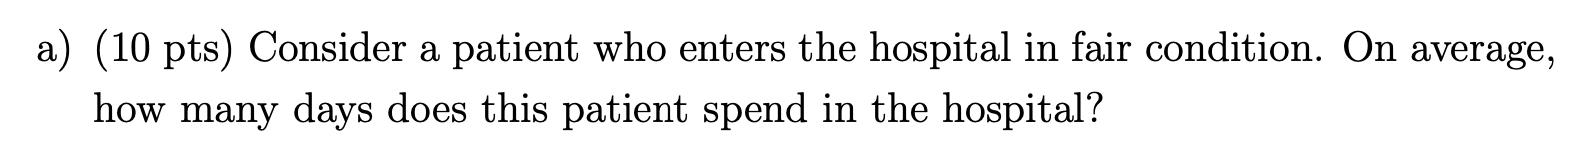

To solve this, we'll need to figure out the first passage time from state Fair (`state 2`) to either discharged states (Improved-`4`, or unimproved-`5`).

The formula for the first time passage probability in a Discrete-Time Markov Chain (DTMC) can be expressed as follows:

![First Time Passage Equation](DTMC_first_passage_time.png)

$$\mu_{ij}=1+\sum_{k\ne j}p_{ik}\mu_{kj}$$

Where ($ \mu_{ij} $) represents the expected time of transitioning from state ($ i $) to state ($ j $) for the first time after ($ n $) steps in the DTMC.

For the purpose of this, we'll define the rate matrix $P^\prime$ where state 4 is "improved" or "unimproved" (e.g., discharged in general.)

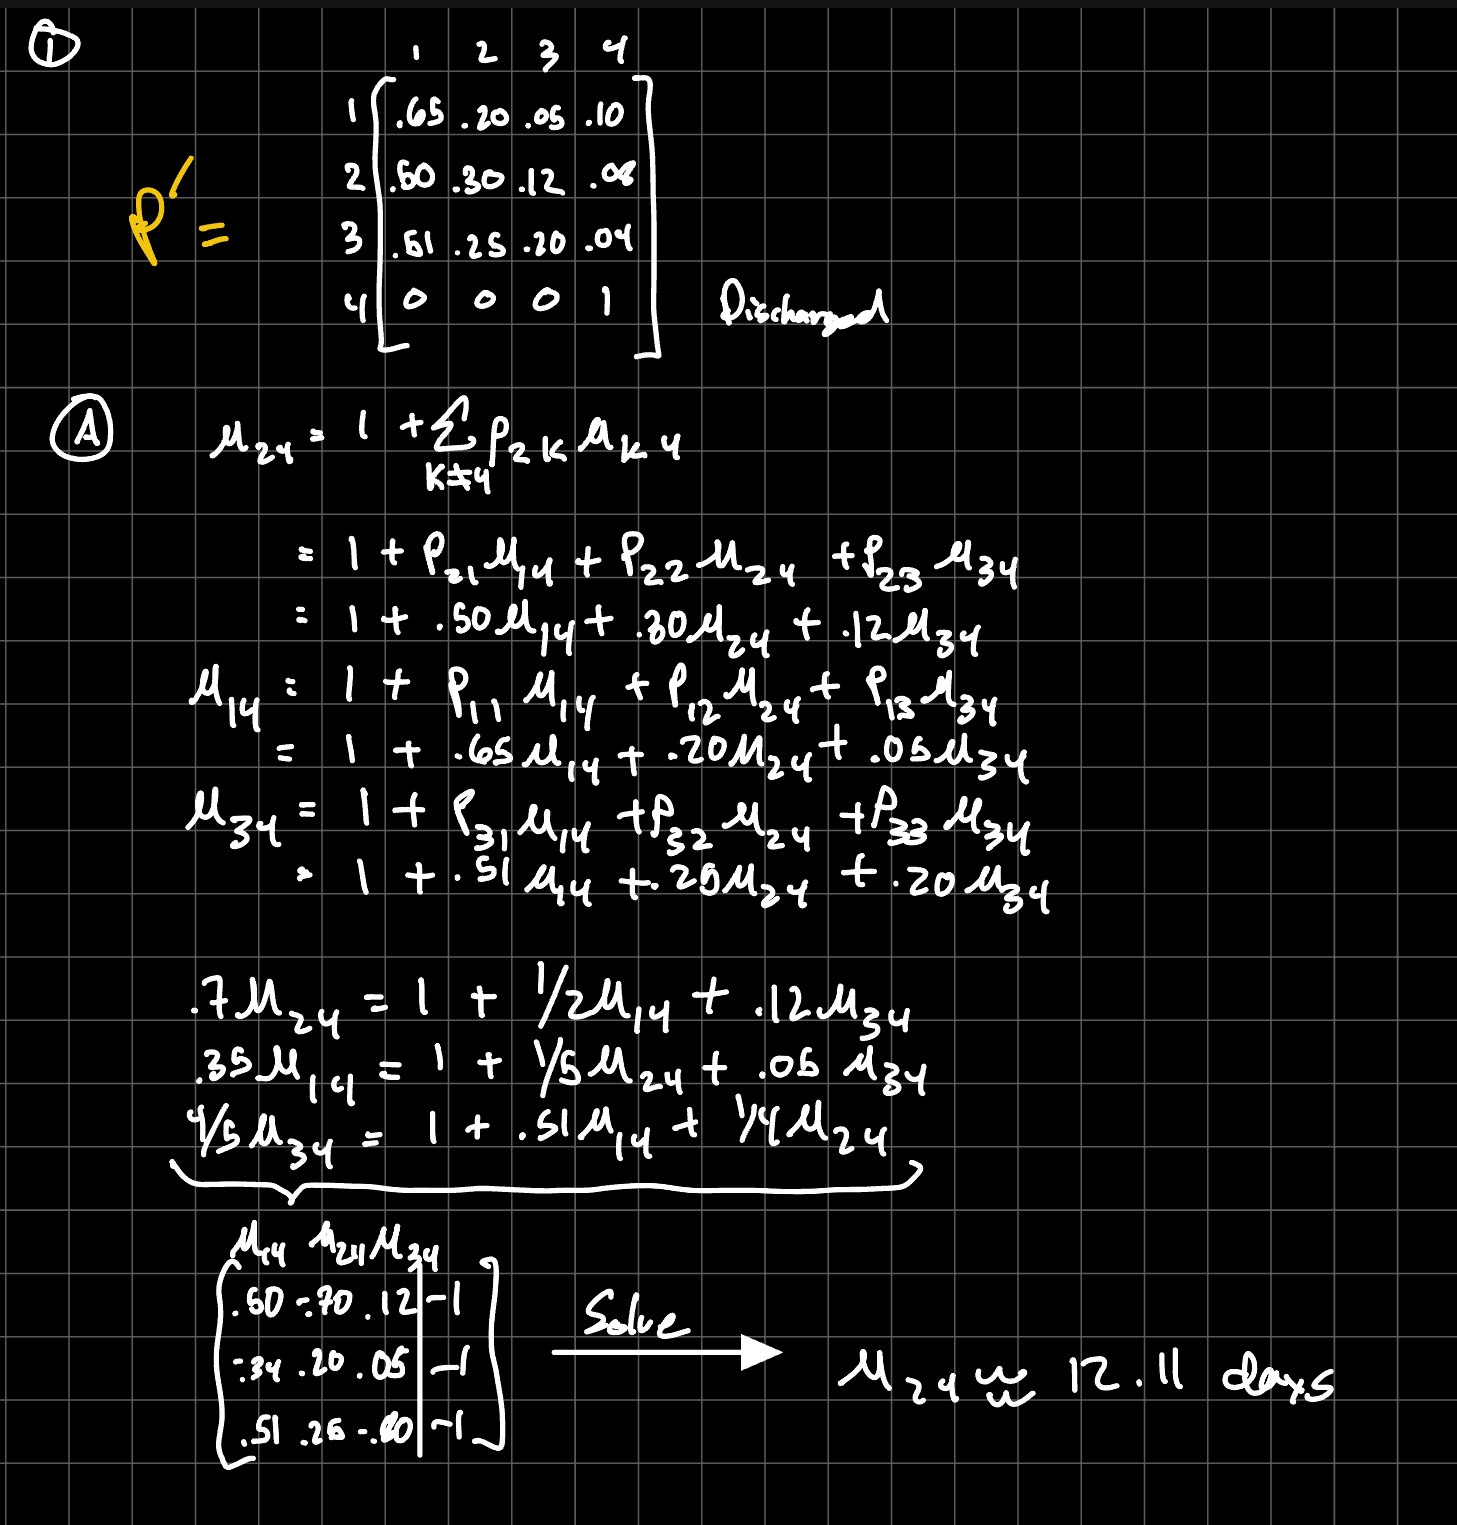

In [40]:
import numpy as np

# Define the matrix A and vector b
A = np.array([
    [.5,-.7,.12],
    [-.35,.2,.05], ## I double checked my work it should be -.35 not -.34
    [.51,.25,-.8]
])

b = np.array([-1, -1, -1])

# Solve for x using numpy's linear algebra solver
x1 = np.linalg.solve(A, b)

x1[1] # mu24

11.317235396182765

This patient will spends $\approx 11.317235396182765$ days in the hopsital.

---

## Question B
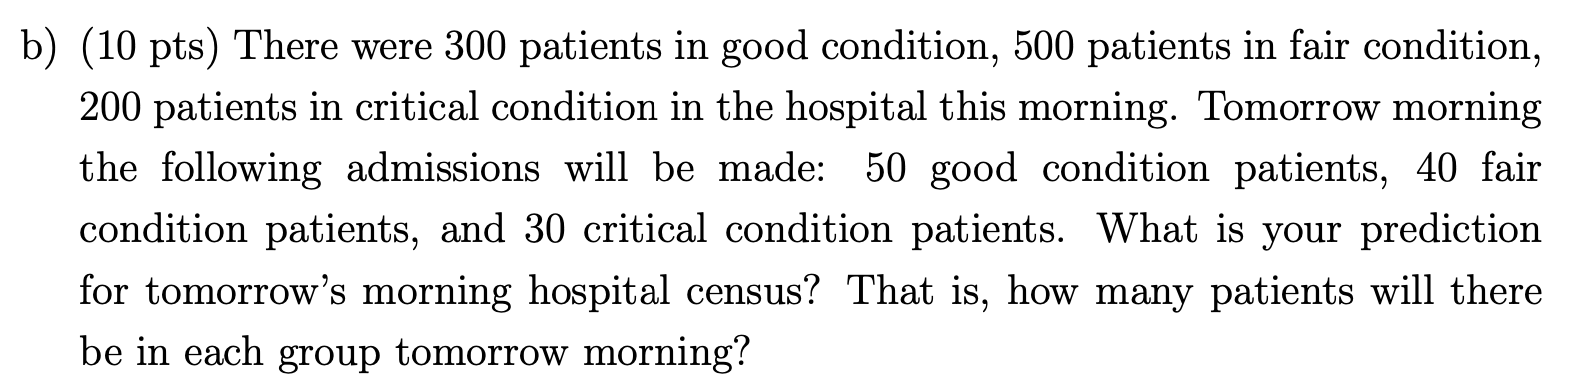

To represent this as a vector let's consider today's distribution, $\vec d_0$ and tomorrow's $\vec d_1$
$$
\begin{align}
\vec d_0 &= [300,500,200,0,0]\\
\vec d_1 &= [50,40,30,0,0]
\end{align}
$$

We'd expect the expected distribution of patients tomorrow to be:
$$d_0\times P^{(1)}+d_1$$

Where 
$$
P = \begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}
$$

Thus



$$
[300,500,200,0,0] \times 

\begin{bmatrix}
0.65 & 0.20 & 0.05 & 0.08 & 0.02 \\
0.50 & 0.30 & 0.12 & 0.05 & 0.03 \\
0.51 & 0.25 & 0.20 & 0.02 & 0.02 \\
0.00 & 0.00 & 0.00 & 1.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 1.00 \\
\end{bmatrix}

+[50,40,30,0,0]
$$

Would be the final distribution

In [41]:
# Define the initial vector and the transition matrix, and the additional vector
initial_vector = np.array([300, 500, 200, 0, 0])
transition_matrix = np.array([
    [0.65, 0.20, 0.05, 0.08, 0.02],
    [0.50, 0.30, 0.12, 0.05, 0.03],
    [0.51, 0.25, 0.20, 0.02, 0.02],
    [0.00, 0.00, 0.00, 1.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 1.00]
])
additional_vector = np.array([50, 40, 30, 0, 0])

# Perform the matrix multiplication and addition
result_vector = initial_vector.dot(transition_matrix) + additional_vector
result_vector


array([597., 300., 145.,  53.,  25.])

In [42]:
result_vector[0]+result_vector[1]+result_vector[2]

1042.0

In [43]:
result_vector[3]+result_vector[4]

78.0

At the end of today, we'd expect `78` patients to discharge from the hospital, with a total of `1042` patients in the hopsital tomorrow morning (including the newly admitted patients).

Tomorrow morning, we'd expect patients in the following conditions
* 597 - Good
* 300 - Fair
* 145 - Critical

---
## Question C

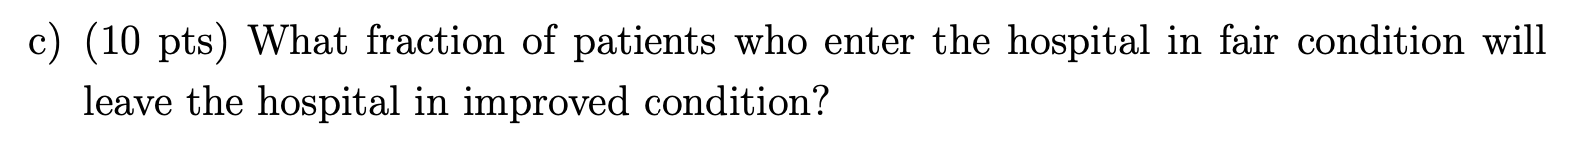

To answer this question, we'll use the Probability of Absorption concepts 

![Probability of Absorption](DTMC_probability_of_absorption.png)

### Probability of Absorption
$$f_{ij}=\sum_{k\in S}p_{ik}f_{kj}

### Solving for $f_{24}$, we get:

\begin{align*}
f_{14} &= 0.65f_{14} + 0.20f_{24} + 0.05f_{34} + 0.08 \cdot 1 + 0.02 \cdot 0 \\
f_{24} &= 0.50f_{14} + 0.30f_{24} + 0.12f_{34} + 0.05 \cdot 1 + 0.03 \cdot 0 \\
f_{34} &= 0.51f_{14} + 0.25f_{24} + 0.20f_{34} + 0.02 \cdot 1 + 0.02 \cdot 0 \\
\end{align*}

Rearranging these equations to the standard form:

$$
\begin{bmatrix}
0.35 & -0.20 & -0.05 \\
-0.50 & 0.70 & -0.12 \\
-0.51 & -0.25 & 0.78 \\
\end{bmatrix}
\begin{bmatrix}
f_{14} \\
f_{24} \\
f_{34} \\
\end{bmatrix}
=
\begin{bmatrix}
0.08 \\
0.05 \\
0.02 \\
\end{bmatrix}
$$

In [44]:
# Define the matrix A and vector b for the absorption probabilities
A_absorption = np.array([
    [0.35, -0.20, -0.05],
    [-0.50, 0.70, -0.12],
    [-0.51, -0.25, 0.78]
])

b_absorption = np.array([0.08, 0.05, 0.02])

# Solve for f14, f24, f34 using numpy's linear algebra solver
absorption_probabilities = np.linalg.solve(A_absorption, b_absorption)
absorption_probabilities


array([0.76795955, 0.75175068, 0.76871416])

In [45]:
f24= absorption_probabilities[1]
f24

0.7517506791427708

### Setting up the system of equations for $f_{25}$:
From the transition matrix:
$$
\begin{align*}
f_{15} &= 0.65f_{15} + 0.20f_{25} + 0.05f_{35} + 0.08 \cdot 0 + 0.02 \cdot 1 \\
f_{25} &= 0.50f_{15} + 0.30f_{25} + 0.12f_{35} + 0.05 \cdot 0 + 0.03 \cdot 1 \\
f_{35} &= 0.51f_{15} + 0.25f_{25} + 0.20f_{35} + 0.02 \cdot 0 + 0.02 \cdot 1 \\
\end{align*}
$$

Rearranging these to the standard form:

$$
\begin{bmatrix}
0.35 & -0.20 & -0.05 \\
-0.50 & 0.70 & -0.12 \\
-0.51 & -0.25 & 0.78 \\
\end{bmatrix}
\begin{bmatrix}
f_{15} \\
f_{25} \\
f_{35} \\
\end{bmatrix}
=
\begin{bmatrix}
0.02 \\
0.03 \\
0.02 \\
\end{bmatrix}
$$

In [46]:
# Define the matrix A and vector b for the absorption probabilities to "Unimproved"
A_absorption = np.array([
    [0.35, -0.20, -0.05],
    [-0.50, 0.70, -0.12],
    [-0.51, -0.25, 0.78]
])

b_absorption = np.array([0.02, 0.03, 0.02])

# Solve for f15, f25, f35 using numpy's linear algebra solver
absorption_probabilities_unimproved = np.linalg.solve(A_absorption, b_absorption)
f25 = absorption_probabilities_unimproved[1]
f25

0.2684726833685482

Since $f_{24}$ and $f_{25}$ are the only absorbing states for this system, we can model the following:

$$P(\text{Patient enters the hospital in fair condition and leaves in improved condition})=\frac{f_{24}}{f_{24}+f_{25}}$$

In [47]:
f24/(f25+f24)

0.7368491124260355

About 73% of patients who enter the hospital in fair condition will leave in an improved condition.

---

---
# Question 2

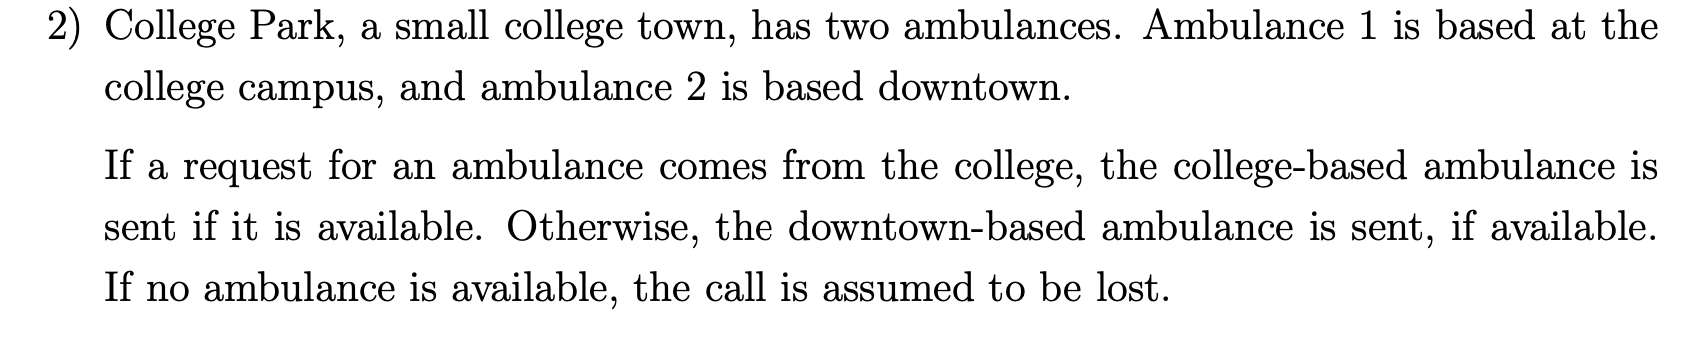
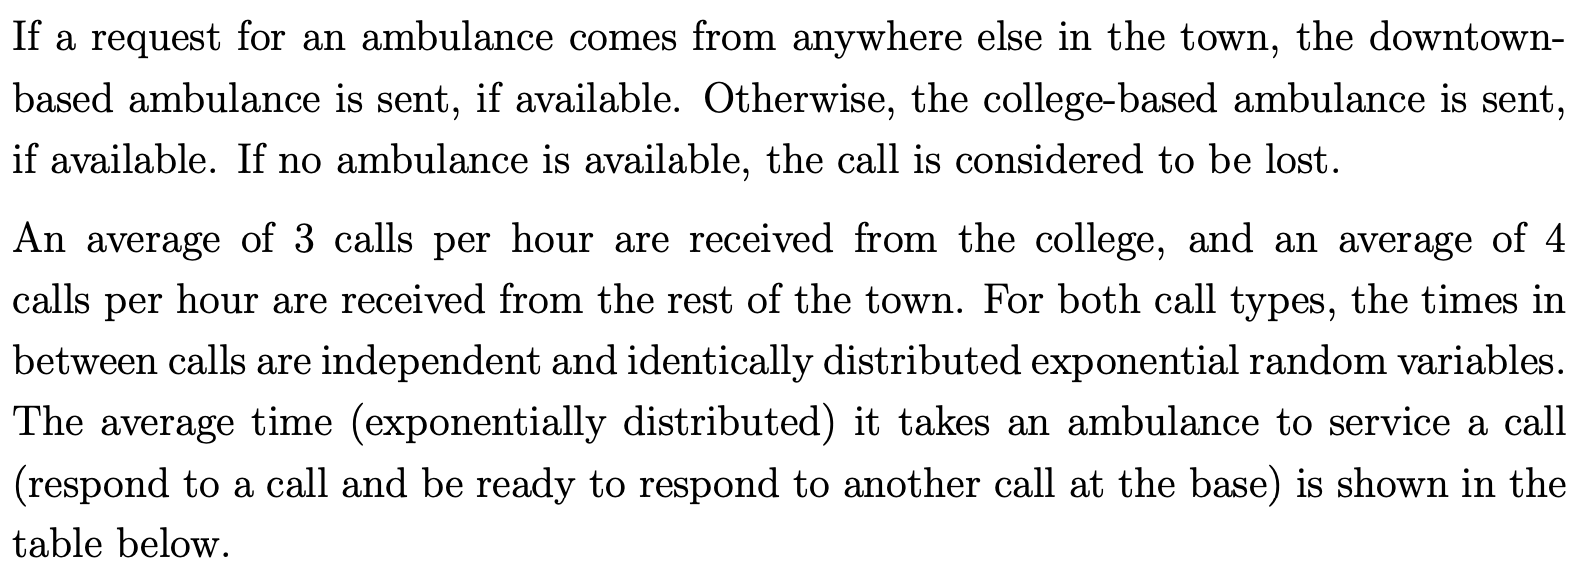


![ambulance_response](ambulance_response.png)

---

## Question A

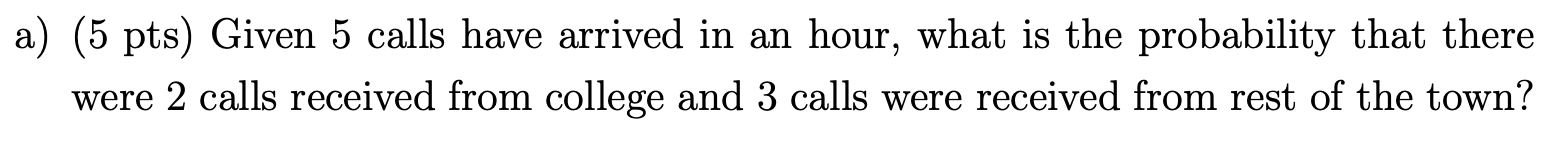

### Setting up my vars

let
* C be the number of calls from the college, 
* D be the number of calls from downtown
* X be the number of calls in an hour


The question is therefore asking us to evaluate:

$$P(C=2, D=3|C+D=5)$$

let
* $N_C \sim Exp(1/3),\lambda_C=3$, where $N_C$ is the number of calls per hour from the college
* $N_D \sim Exp(1/4),\lambda_D=4$, where $N_D$ is the number of calls per hour from the city
* p, the chance that a call comes from the college

$$
p=\frac{\lambda_C}{\lambda_C+\lambda_D}=\frac{3}{7}
$$

Thus we can model this as:

$$P(C=k|C+D=n)=\binom{n}{k}p^k(1-p)^{n-k}$$

$$P(C=2, D=3|C+D=5)=\binom{5}{2}p^2(1-p)^{5-2}\approx 0.34271434521330396$$

In [48]:
from scipy.stats import binom

# Re-defining parameters for the binomial distribution
n = 5  # total number of calls
k = 2  # number of calls from college
p = 3/7  # probability of a call being from college

# Calculate the probability using the binomial probability mass function
probability = binom.pmf(k, n, p)
probability


0.34271434521330396

The liklihood is therefore about `0.34271434521330396`

---

## Question B

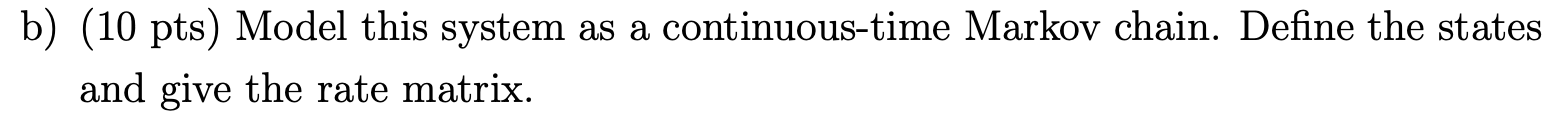


let 
$X(t),X(t)\in\{0,1,2\}$ be the r.v. that represents the # of ambulances busy at time t.

However, for this problem, this does not classify the states for this setup.



Let
* $\mu_{CC}$ be the service rate from college ambulance servicing college call
* $\mu_{CD}$ be the service rate from college ambulance servicing downtown call
* $\mu_{DC}$ be the service rate from downtown ambulance servicing college call
* $\mu_{DD}$ be the service rate from downtown ambulance servicing downtown call

![ambulance_response](ambulance_response.png)

In [49]:
# "arrival rates" for downtown calls and college calls
lamD = 4 
lamC = 3

muCC = 60/4 # rate in hours (1,1) in diagram
muCD = 60/7 # rate in hours (1,0) in diagram
muDC = 60/5 # rate in hours (1,1) in diagram
muDD = 60/4 # rate in hours (1,0) in diagram
print('The rates are muCC =', muCC, 'muCD =', muCD, 'muDC =', muDC, 'muDD =', muDD)

The rates are muCC = 15.0 muCD = 8.571428571428571 muDC = 12.0 muDD = 15.0


There's 9 states, corresponding to the $(i,k,j,h)$ for $i,k,j,h\in\{0,1\}$

See the definitions below:
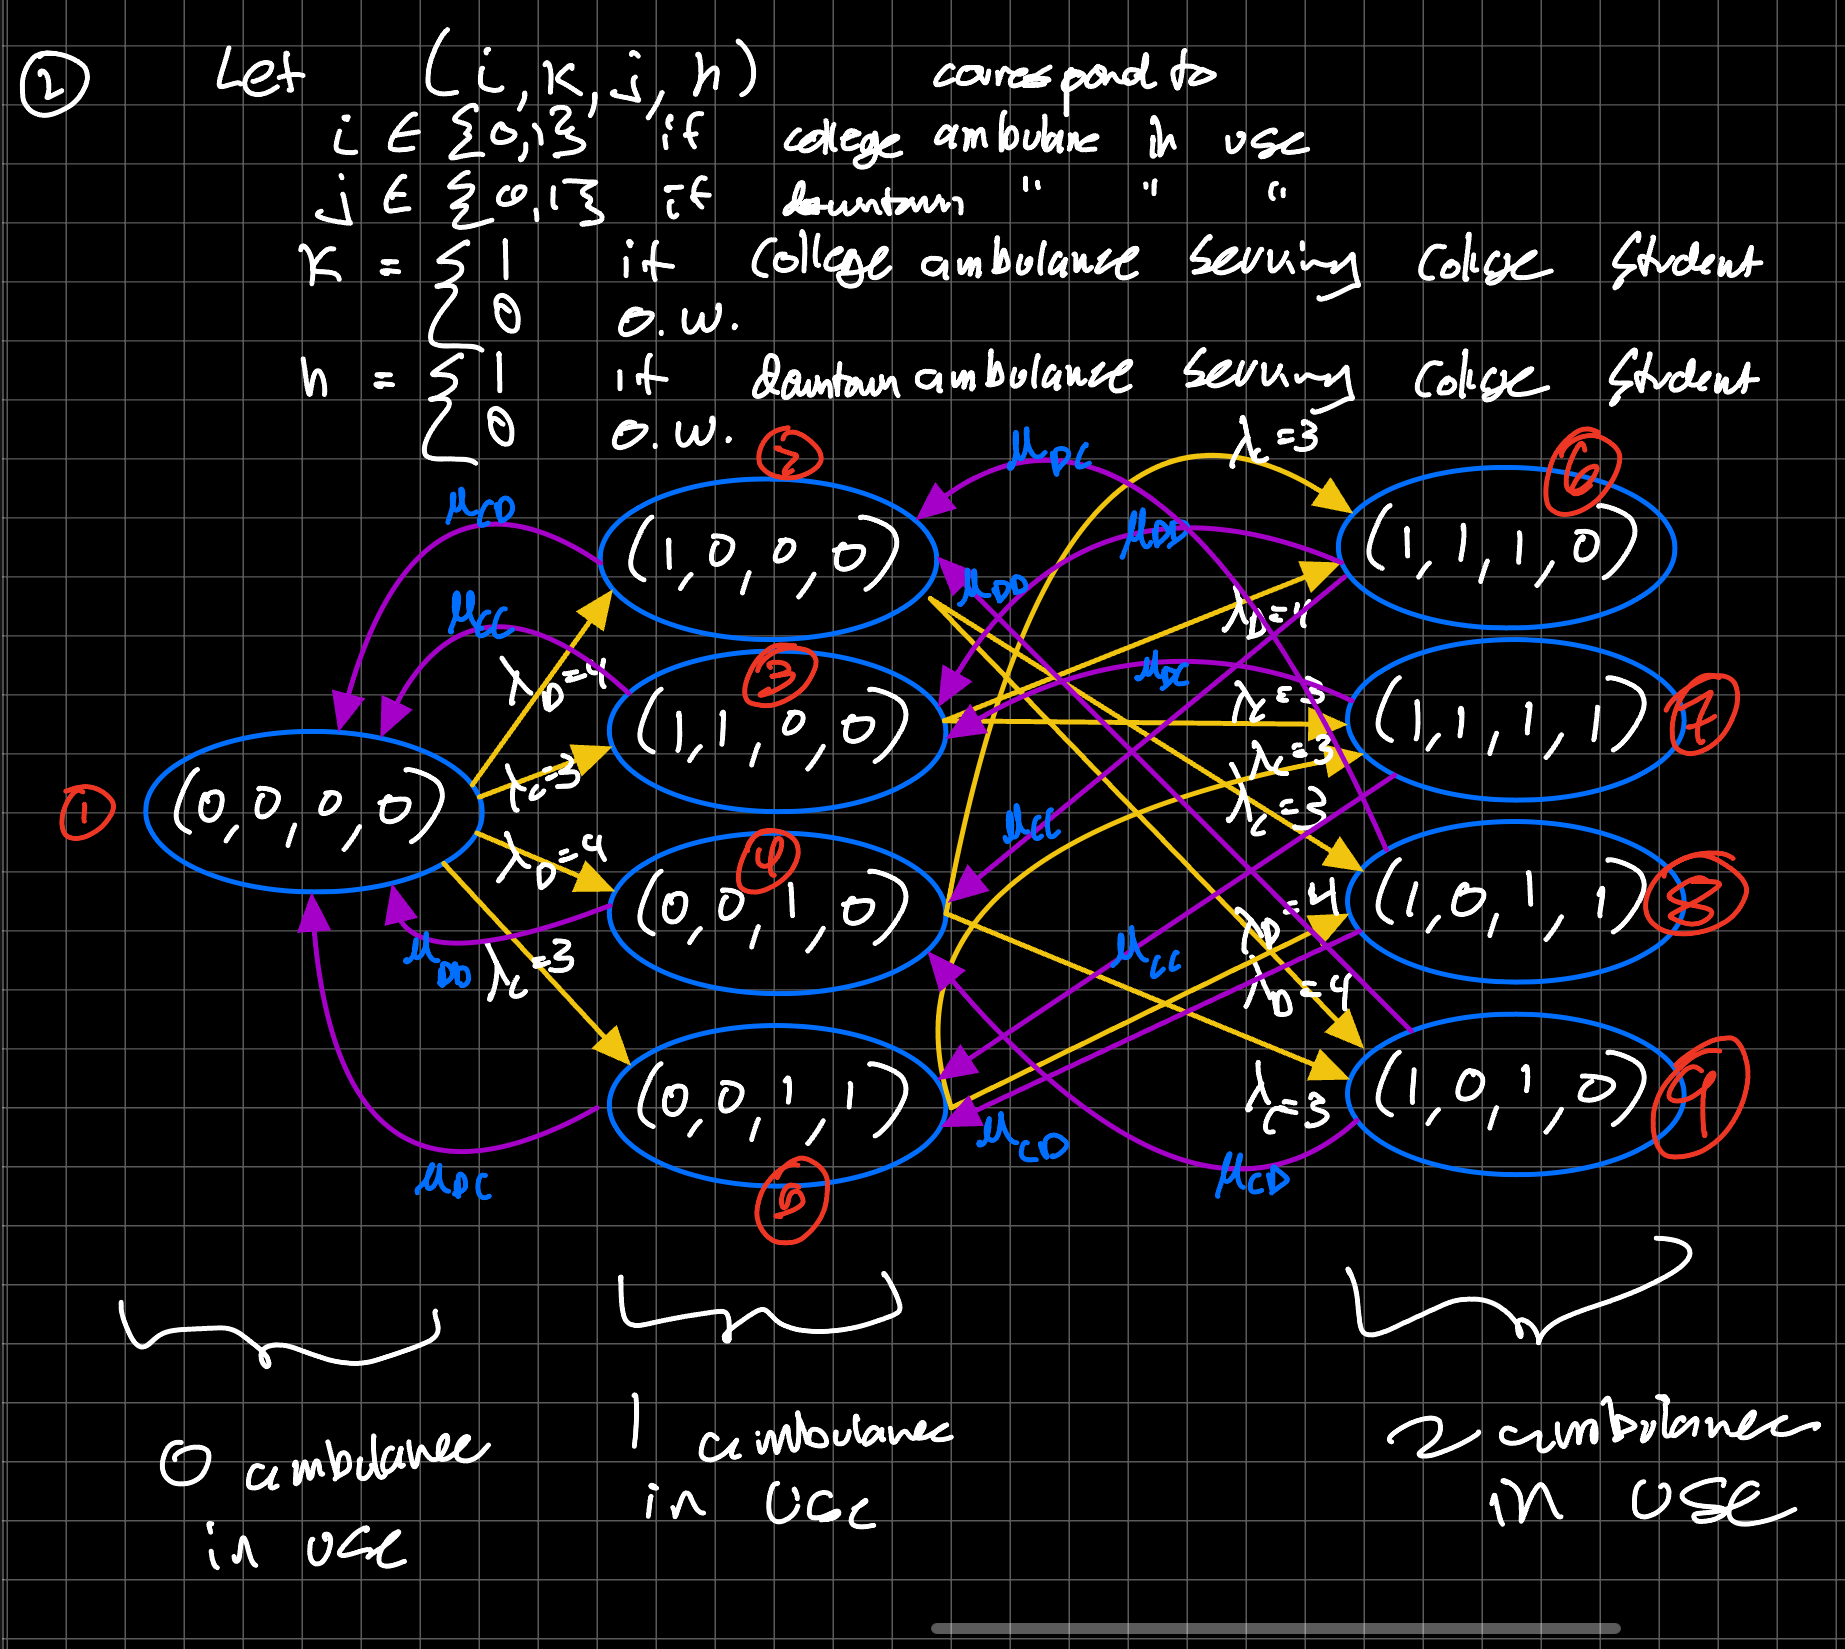


Here's the rate matrix:

In [50]:
R = [#1     #2      #3      #4      #5      #6      #7      #8      #9
    [0,     0,      lamC,   lamD,   0,      0,      0,      0,      0],     #1 # slight error here 
    [muCD,  0,      0,      0,      0,      0,      0,      lamC,   lamD],  #2
    [muCC,  0,      0,      0,      0,      lamD,   lamC,   0,      0],     #3
    [muDD,  0,      0,      0,      0,      lamC,   0,      0,      lamD],  #4 # slight error here 
    [muDC,  0,      0,      0,      0,      0,      lamC,   lamD,   0],     #5
    [0,     0,      muDD,   muCC,   0,      0,      0,      0,      0],     #6
    [0,     0,      muDC,   0,      muCC,   0,      0,      0,      0],     #7
    [0,     muDC,   0,      0,      muCD,   0,      0,      0,      0],     #8
    [0,     muDD,   0,      muCD,   0,      0,      0,      0,      0],     #9
]
R

[[0, 0, 3, 4, 0, 0, 0, 0, 0],
 [8.571428571428571, 0, 0, 0, 0, 0, 0, 3, 4],
 [15.0, 0, 0, 0, 0, 4, 3, 0, 0],
 [15.0, 0, 0, 0, 0, 3, 0, 0, 4],
 [12.0, 0, 0, 0, 0, 0, 3, 4, 0],
 [0, 0, 15.0, 15.0, 0, 0, 0, 0, 0],
 [0, 0, 12.0, 0, 15.0, 0, 0, 0, 0],
 [0, 12.0, 0, 0, 8.571428571428571, 0, 0, 0, 0],
 [0, 15.0, 0, 8.571428571428571, 0, 0, 0, 0, 0]]

$$

R = \begin{bmatrix}
0 & 0 & \lambda_C & \lambda_D & 0 & 0 & 0 & 0 & 0 \\
\mu_{CD} & 0 & 0 & 0 & 0 & 0 & 0 & \lambda_C & \lambda_D \\
\mu_{CC} & 0 & 0 & 0 & 0 & \lambda_D & \lambda_C & 0 & 0 \\
\mu_{DD} & 0 & 0 & 0 & 0 & \lambda_C & 0 & 0 & \lambda_D \\
\mu_{DC} & 0 & 0 & 0 & 0 & 0 & \lambda_C & \lambda_D & 0 \\
0 & 0 & \mu_{DD} & \mu_{CC} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \mu_{DC} & 0 & \mu_{CC} & 0 & 0 & 0 & 0 \\
0 & \mu_{DC} & 0 & 0 & \mu_{CD} & 0 & 0 & 0 & 0 \\
0 & \mu_{DD} & 0 & \mu_{CD} & 0 & 0 & 0 & 0 & 0
\end{bmatrix}

\text{where} \\
\lambda_D = 4, \\
\lambda_C = 3, \\
\mu_{CD} \approx 8.57, \\
\mu_{CC} = 15, \\
\mu_{DD} = 15, \\
\mu_{DC} = 12\\
$$

---

## Part C
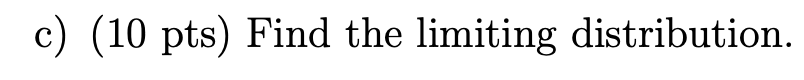

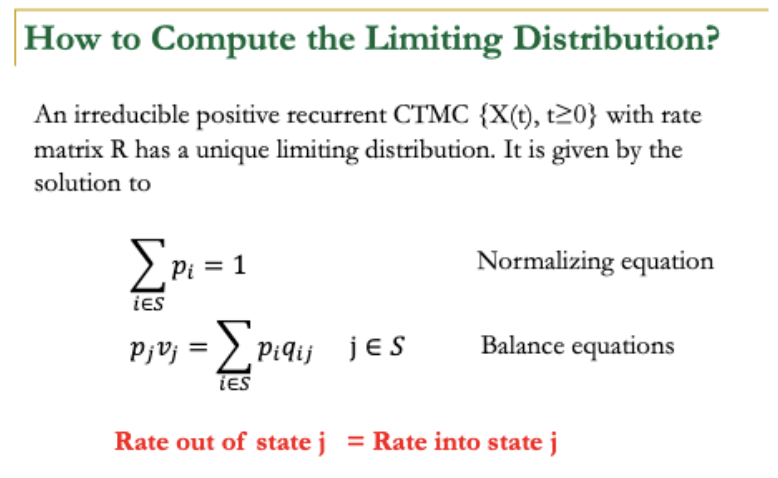

### Norming Equation
$$ \sum_{i\in S}p_i=1\\$$

### Balancing Equations
$$p_j\nu_j=\sum_{i\in S}p_iq_{ij}$$

Where the Rate Matrix: $R=[q_{ij}]$

$\nu_i$ is the sum of each row in R

In [51]:
nu = [sum(nu) for nu in R]
nu

[7,
 15.571428571428571,
 22.0,
 22.0,
 19.0,
 30.0,
 27.0,
 20.57142857142857,
 23.57142857142857]

In [52]:
len(nu)

9

### Norming Equation:
$$p_1+
p_1+
p_2+
p_3+
p_4+
p_5+
p_6+
p_7+
p_8+
p_9=1$$

### Balancing Equations for 9 States

$$
\begin{align*}
p_1 \cdot 7 &= p_2 \cdot \mu_{CD} + p_3 \cdot \mu_{CC} + p_4 \cdot \mu_{DD} + p_5 \cdot \mu_{DC} \\
p_2 \cdot 15.571428571428571 &= p_9 \cdot \mu_{DD} + p_8 \cdot \mu_{DC} \\
p_3 \cdot 22.0 &= p_1 \cdot \lambda_C + p_6 \cdot \mu_{DD} + p_7 \cdot \mu_{DC} \\
p_4 \cdot 22.0 &= p_1 \cdot \lambda_D + p_6 \cdot \mu_{CC} + p_9 \cdot \mu_{CD} \\
p_5 \cdot 19.0 &=  p_7 \cdot \mu_{CC} + p_8 \cdot \mu_{CD} \\
p_6 \cdot 30.0 &= p_3 \cdot \lambda_D + p_4 \cdot \lambda_C \\
p_7 \cdot 27.0 &= p_3 \cdot \lambda_C + p_5 \cdot \lambda_C \\
p_8 \cdot 20.57142857142857 &= p_2 \cdot \lambda_C + p_5 \cdot \lambda_D \\
p_9 \cdot 23.57142857142857 &= p_2 \cdot \lambda_D + p_4 \cdot \lambda_D \\
\end{align*}

$$


In [53]:
import numpy as np

# Create the matrix A
A = np.array([
    #1          #2          #3          #4          #5          #6          #7          #8          #9  
    [-1*nu[0],  muCD,       muCC,       muDD,       muDC,       0,          0,          0,          0],     # p1
    [0,         -1*nu[1],   0,          0,          0,          0,          0,          muDC,       muDD],  # p2
    [lamC,      0,          -1*nu[2],   0,          0,          muDD,       muDC,       0,          0],     # p3
    [lamD,      0,          0,          -1*nu[3],   0,          muCC,       0,          0,          muCD],  # p4
    [0,         0,          0,          0,          -1*nu[4],   0,          muCC,       muCD,       0],     # p5
    [0,         0,          lamD,       lamC,       0,          -1*nu[5],   0,          0,          0],     # p6
    [0,         0,          lamC,       0,          lamC,       0,          -1*nu[6],   0,          0],     # p7
    [0,         lamC,       0,          0,          lamD,       0,          0,          -1*nu[7],   0],     # p8
    [1,         1,          1,          1,          1,          1,          1,          1,          1]      # Norming equation
]) 

# Create the vector b
b = np.zeros(9)  # Zero for balancing equations
b[-1] = 1  # 1 for the norming equation

# Solve the linear system
p = np.linalg.solve(A, b)

# Output the solution
print("Solution for p1 to p9:", p)


Solution for p1 to p9: [0.61392052 0.03538629 0.11122954 0.14332092 0.0146563  0.0291627
 0.01398732 0.00801034 0.03032607]


In [54]:
sum(p)

1.0

### Limiting Distributions
$$
p_1\approx 0.61392052\\
p_2\approx 0.03538629\\
p_3\approx 0.11122954\\
p_4\approx 0.14332092\\
p_5\approx 0.0146563\\
p_6\approx 0.0291627\\
p_7\approx 0.01398732\\
p_8\approx 0.00801034\\
p_9\approx 0.03032607\\
$$

---

## Part D

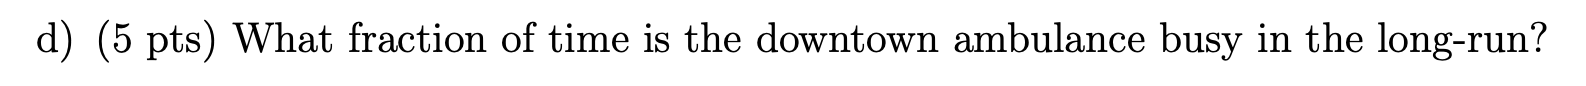

The downtown ambulance is busy in state 4, 5, 6, 7, 8, 9

In [55]:
p[4-1]+p[5-1]+p[6-1]+p[7-1]+p[8-1]+p[9-1]

0.23946365080732665

So the downtown ambulance is busy $\approx 34\%$ of the time

---
## Part E

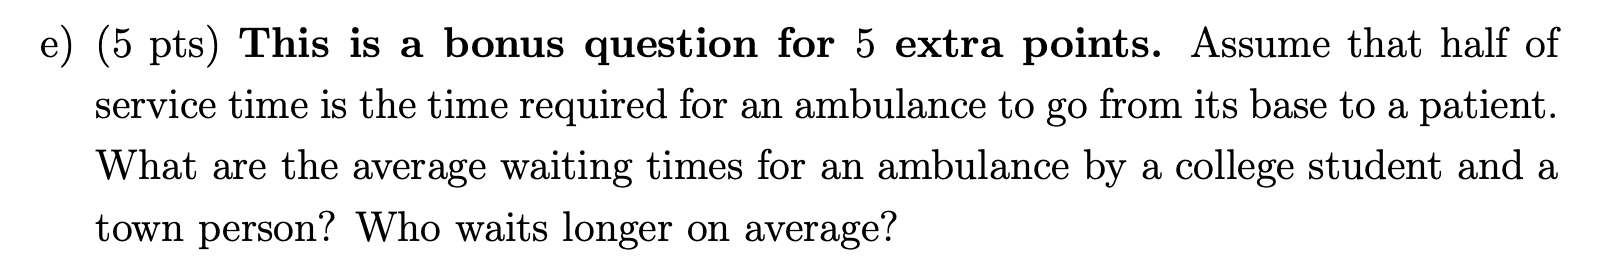

For this problem, we'll assume that if an ambulance is sent to a location, even if the other ambulance could get there faster, at no point would 2 amublances answer 1 call (e.g., in the case that a busy ambulance both frees up and manages to beat the avilable ambulance in responding to the call - we'll ignore this as a not-possible case.)
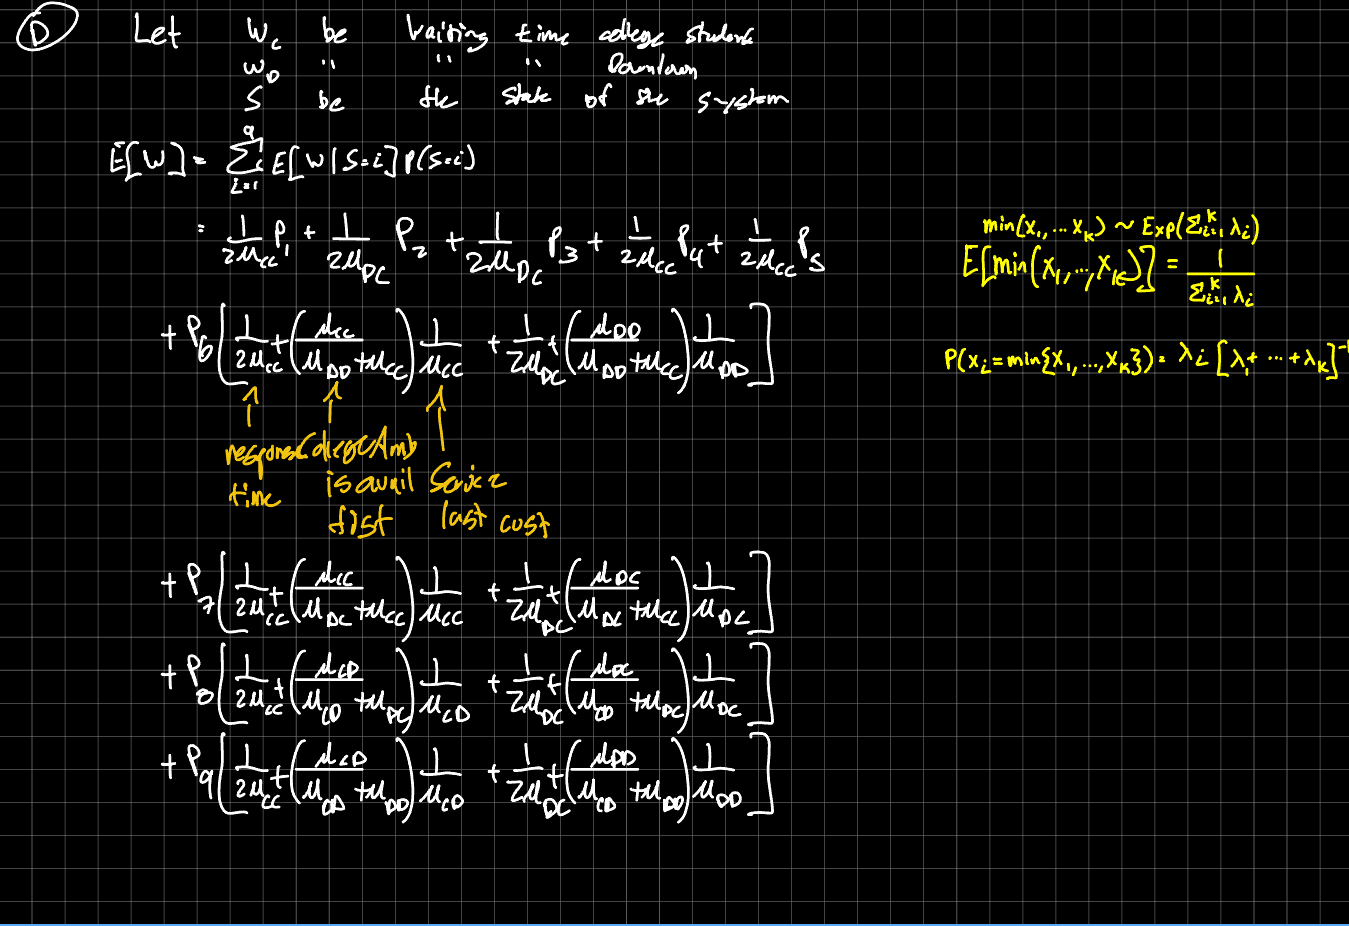

In [56]:
sum(p)

1.0

In [57]:
college_expect_wait = (1/2*1/muCC)*p[1-1]
+(1/2*1/muDC)*p[2-1]
+(1/2*1/muDC)*p[3-1]
+(1/2*1/muCC)*p[4-1]
+(1/2*1/muCC)*p[5-1]
+p[6-1]*(
    (1/2*1/muCC)+
    muCC/(muDD+muCC)*1/muCC+
    (1/2*1/muDC)+
    muDD/(muDD+muCC)*1/muDD
)
+p[7-1]*(
    (1/2*1/muCC)+
    muCC/(muDC+muCC)*1/muCC+
    (1/2*1/muDC)+
    muDC/(muDC+muCC)*1/muDC
)
+p[8-1]*(
    (1/2*1/muCC)+
    muCD/(muCD+muDC)*1/muCD+
    (1/2*1/muDC)+
    muDC/(muCD+muDC)*1/muDC
)
+p[9-1]*(
    (1/2*1/muCC)+
    muCD/(muCD+muDD)*1/muCD+
    (1/2*1/muDC)+
    muDD/(muCD+muDD)*1/muDD
)

0.004847576856081633

In [58]:
college_expect_wait*60

1.2278410368711037

We'd expect to wait about 0.79 minutes as a college student

In [59]:
downtown_expect_wait = (1/2*1/muCD)*p[1-1]
+(1/2*1/muDD)*p[2-1]
+(1/2*1/muDD)*p[3-1]
+(1/2*1/muCD)*p[4-1]
+(1/2*1/muCD)*p[5-1]
+p[6-1]*(
    (1/2*1/muCD)+
    muCC/(muDD+muCC)*1/muCC+
    (1/2*1/muDD)+
    muDD/(muDD+muCC)*1/muDD
)
+p[7-1]*(
    (1/2*1/muCD)+
    muCC/(muDC+muCC)*1/muCC+
    (1/2*1/muDD)+
    muDC/(muDC+muCC)*1/muDC
)
+p[8-1]*(
    (1/2*1/muCD)+
    muCD/(muCD+muDC)*1/muCD+
    (1/2*1/muDD)+
    muDC/(muCD+muDC)*1/muDC
)
+p[9-1]*(
    (1/2*1/muCD)+
    muCD/(muCD+muDD)*1/muCD+
    (1/2*1/muDD)+
    muDD/(muCD+muDD)*1/muDD
)

0.005353011409796305

In [60]:
downtown_expect_wait*60

2.148721814524431

We'd expect to wait about 1.36 minutes as a non-college student

---

# Question 3

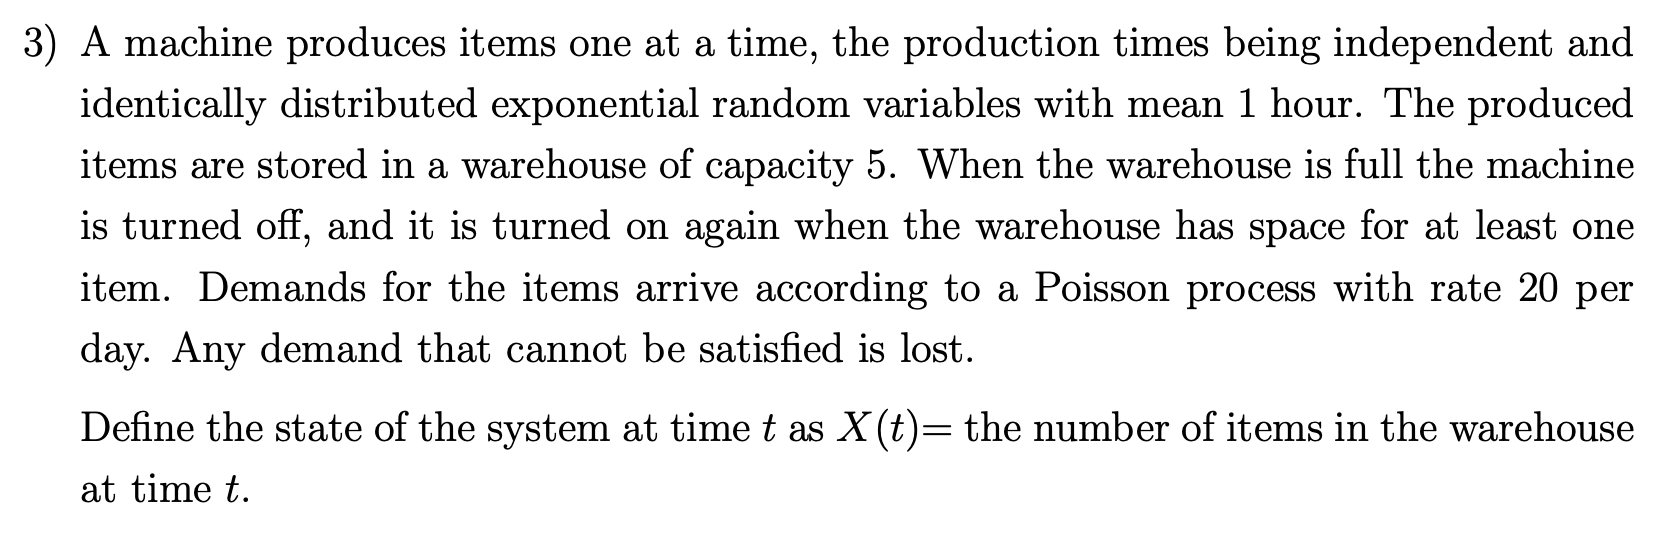

let 
* Service Rate: $\mu=24$ items a day (1/hr) 
* Arrival/Demand Rate: $\lambda=20$ (20/day)
* $k=5$ for the capacity of the system

Since everything is Markovian, this is a M/M/1/5 queueing system

---

## Part A

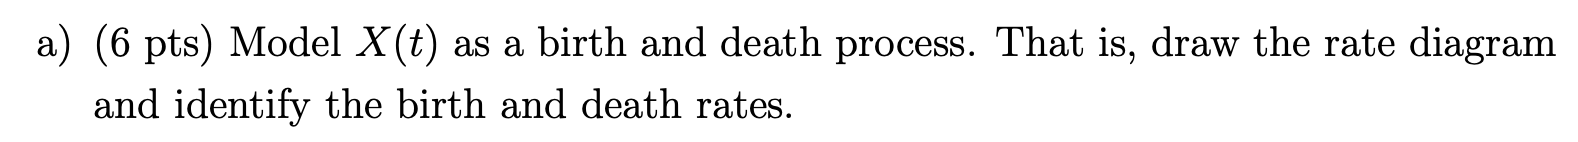


Given:


* Service Rate: $\mu=24$ items a day (1/hr) 
* Arrival/Demand Rate: $\lambda=20$ (20/day)
* $k=5$ for the capacity of the system

See the rate diagram below:

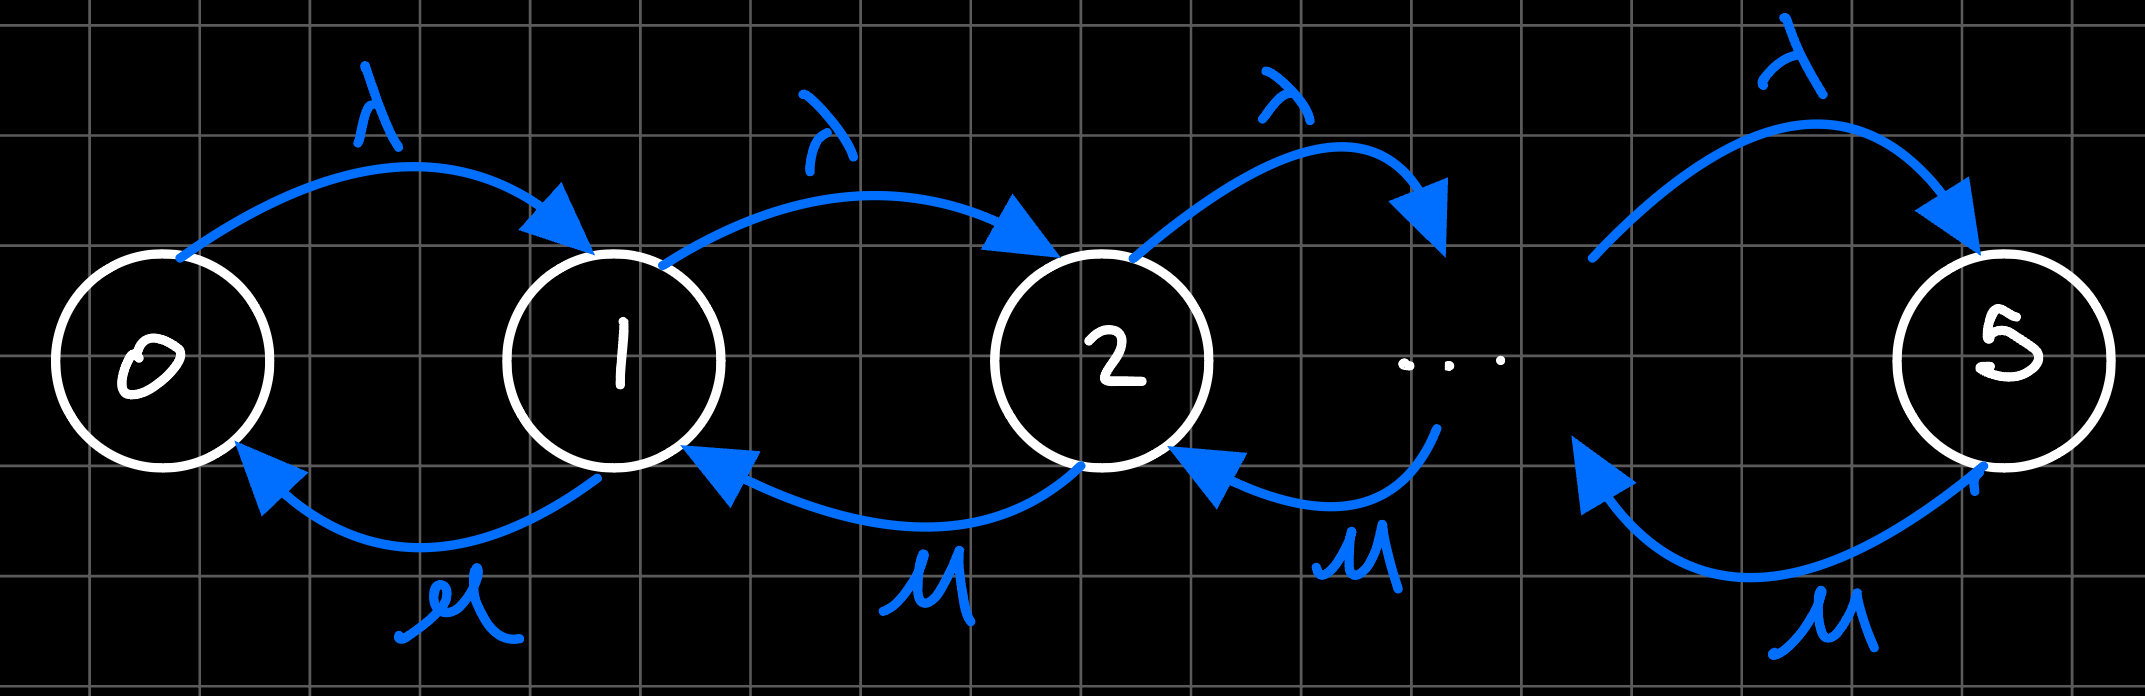


---
## Part B

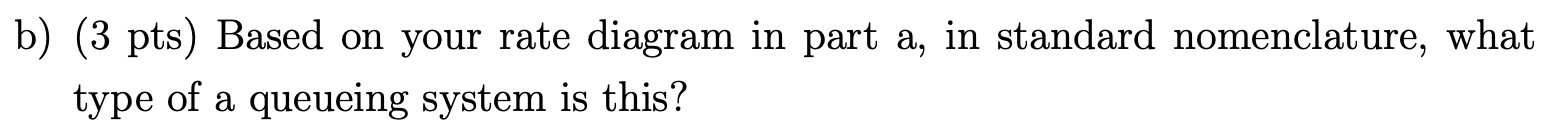

Since everything is Markovian, this is a M/M/1/5 queueing system

---
## Part C

*Answer parts c and d using the formulas for the queueing system that you identified in part b.*

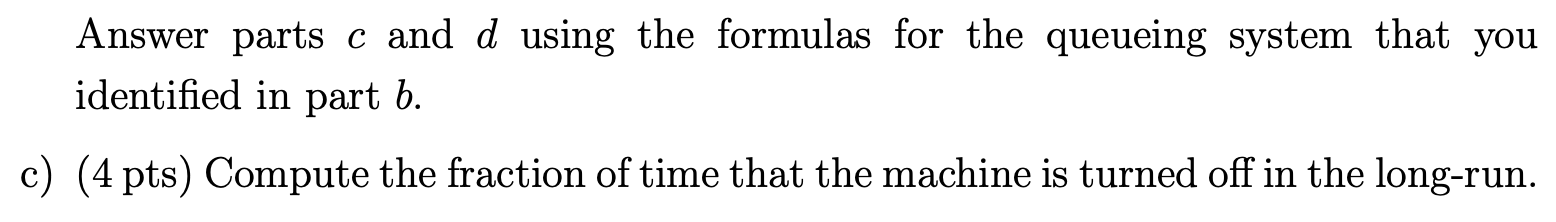


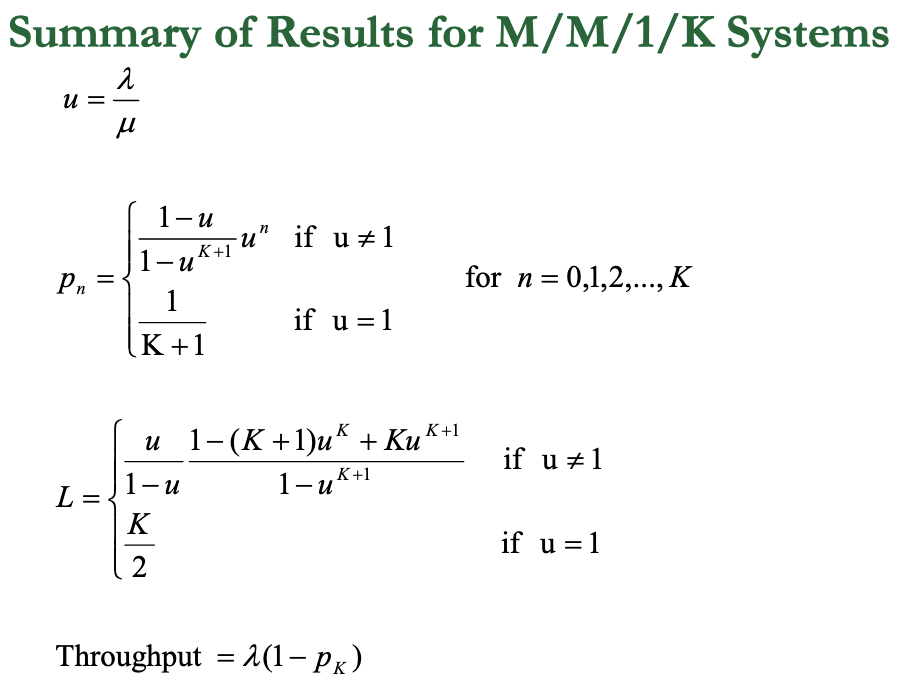

In [61]:
lam = 20
mu = 24

In [62]:
u=lam/mu
u

0.8333333333333334

In [63]:
k=5

In [64]:
p = [(1-u)/(1-u**(k+1))*u**n for n in range(0,k+1)]
p

[0.25058812155586346,
 0.20882343462988623,
 0.17401952885823854,
 0.14501627404853212,
 0.12084689504044344,
 0.1007057458670362]

In [65]:
sum(p)

1.0

The value $ p_0 $ would be the chance that the machine is not working, and therefore shut off.

That would be the following:

In [66]:
p[5]

0.1007057458670362

The fraction of time that the machine is turned off is $$p_5\approx 10.07057458670362\% $$

---
## Part D

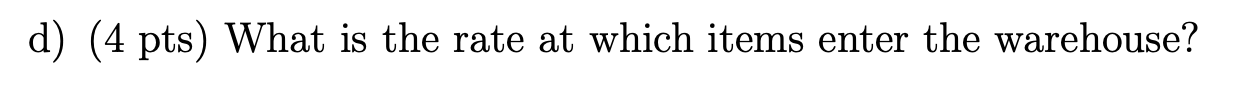



If there was no capacity constraint, the rate of items entereing the wearhouse would equal the rate of production of the machine, $\mu=24$.

Since there's is only a capacity of 5, we could formulate the rate of items entering the wearhouse as:

$$
\mu\times(1-p_5)
$$

cutting out the portion of time that the machine cannot produce due to capacity constraints.

In [67]:
mu*(1-p[5])

21.58306209919113

The adjusted rate would be $\lambda^\prime\approx21.58306209919113$

---
## Part E

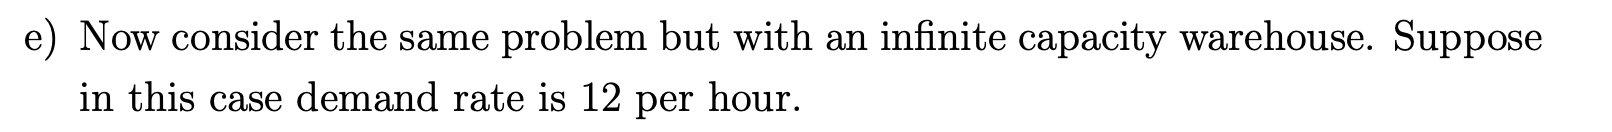
*Suppose in this case demand rate is 12 per hour.*

Let
* $\lambda = 288$ for daily demand (12/hr, 24 hrs)

Now we are modeling a M/M/1 system, with no K constraint as the wearhouse has infinity capacity


In [68]:
lam = 12*24
lam

288

---

### Problem (i)

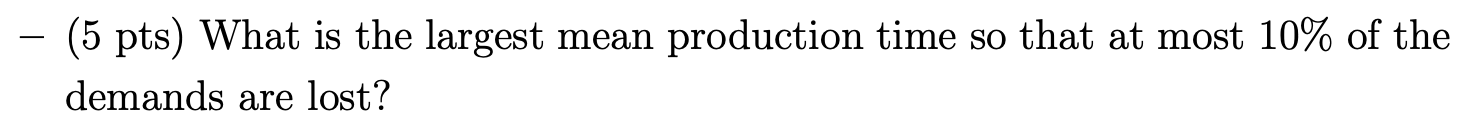

$$E[\text{production time}]=1/\mu$$

Thus $$ max\{E[\text{production time}]\}$$ means we want $$  min\{\mu\} $$

Demand is lost when there are no product to sell, and the wearhouse it empty. This will happen $p_0$ of the time.

For M/M/1, p_n is calculated as 

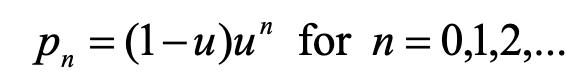

We want $p_0=0.1$

Given 

$$
u = \frac{\lambda}{\mu}
$$

Thus $$ 0.10 = 1 - \frac{\lambda}{\mu} $$

Thus 

$$\mu = \frac{\lambda}{0.90} $$

In [69]:
mu = lam/.9
mu

320.0

Thus $\mu=320$ produced per day will maximize the expected production time.

---

### Part (ii)

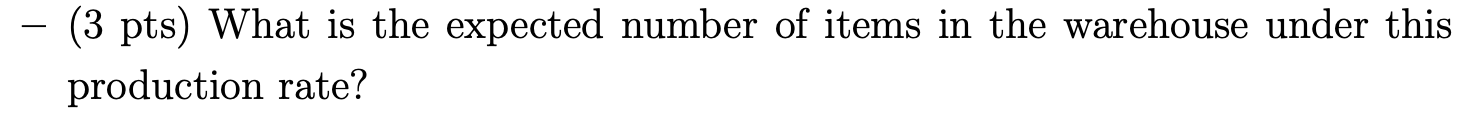


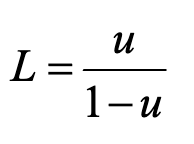

In [70]:
lam

288

In [71]:
mu

320.0

In [72]:
u = lam/mu
L = u/(1-u)
L

9.000000000000002

We'd expect there to be about $L= 9$ items in the system.

---

---

# Question 4

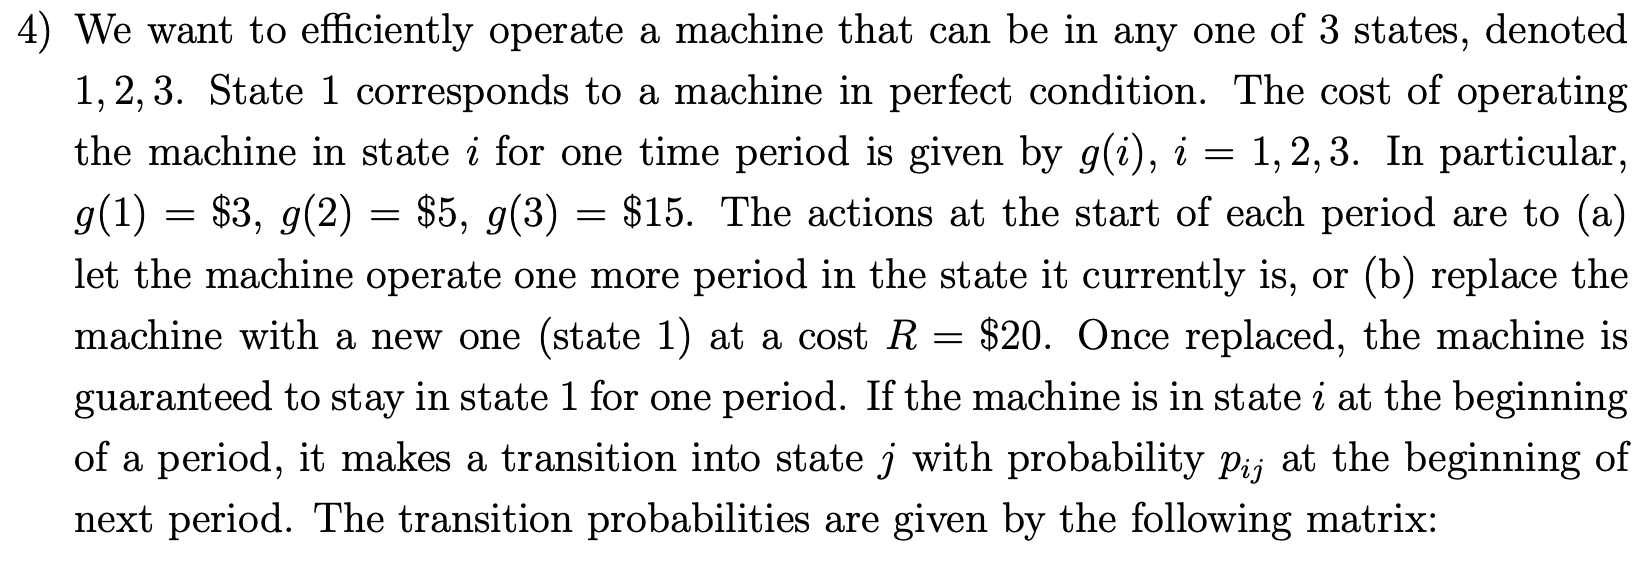

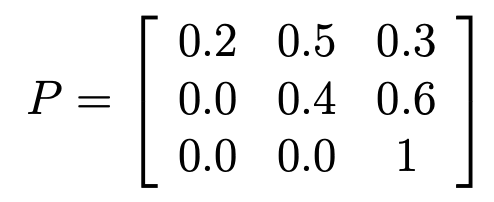

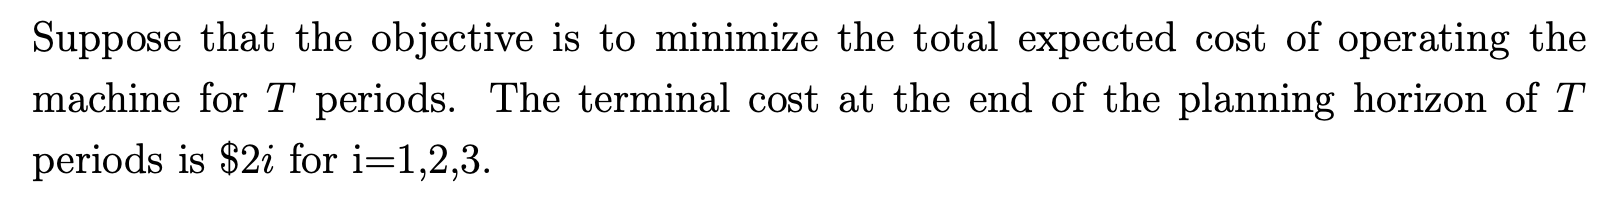

The terminal cost at the end of the planning horizon of T periods is $\$2_i$ for $i=1,2,3$.


---

## Part A

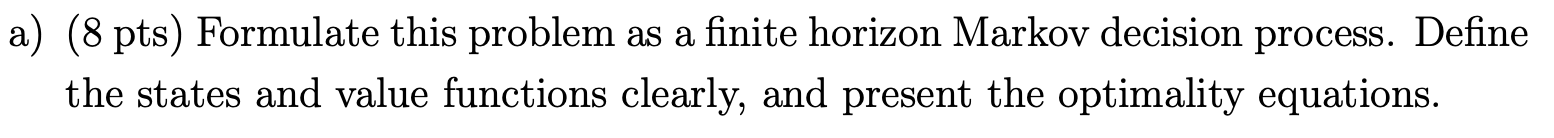

The states are 

$$
S=\{1,2,3\}
$$

Where each $i\in S$ is a state of the machine

The value functions are:



The optimality equation's are as follows

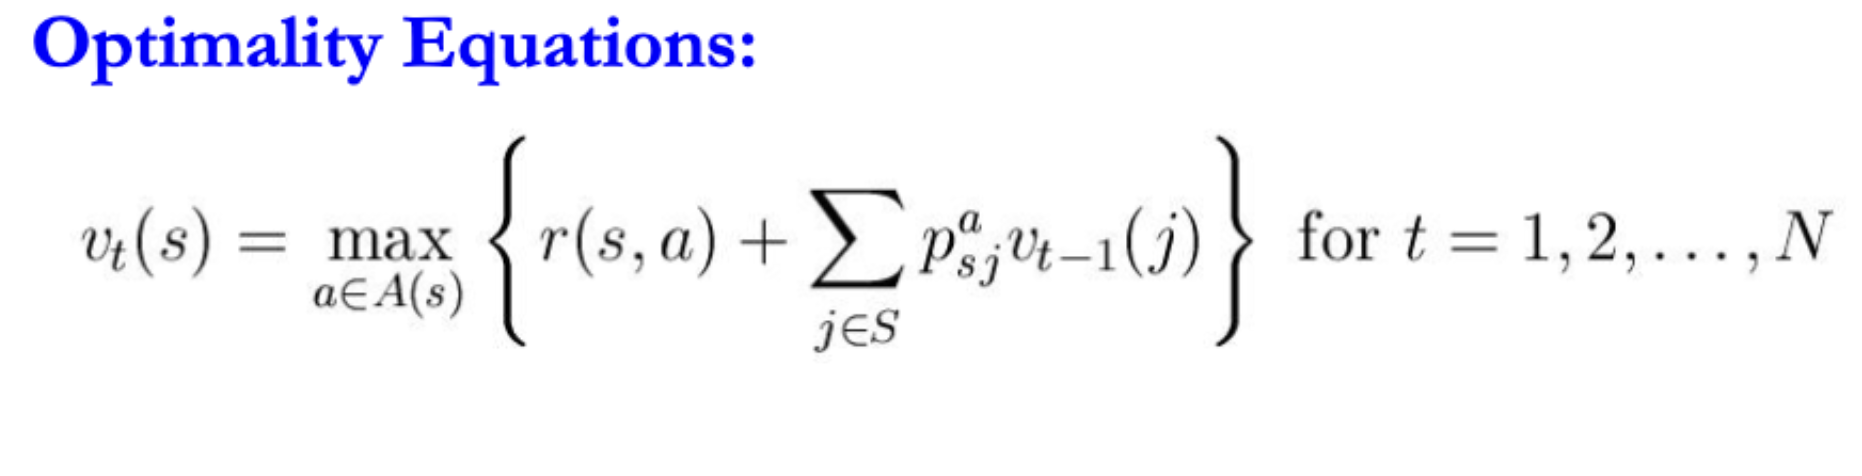


The Optimality Equations:

$$

\begin{align*}
v_n(1) &= \min\{g(1) + 0.2v_{n-1}(1) + 0.5v_{n-1}(2) + 0.3v_{n-1}(3),g(1)+ R + v_{n-1}(1)\} \\
       &= \min\{3 + 0.2v_{n-1}(1) + 0.5v_{n-1}(2) + 0.3v_{n-1}(3), 23 + v_{n-1}(1)\} \\
v_n(2) &= \min\{g(2) + 0.4v_{n-1}(2) + 0.6v_{n-1}(3), g(1)+R + v_{n-1}(1)\} \\
       &= \min\{5 + 0.4v_{n-1}(2) + 0.6v_{n-1}(3), 23 + v_{n-1}(1)\} \\
v_n(3) &= \min\{g(3) + 1.0v_{n-1}(3), g(1)+R + v_{n-1}(1)\} \\
       &= \min\{15 + 1.0v_{n-1}(3), 23 + v_{n-1}(1)\} \\
\end{align*}


$$

---

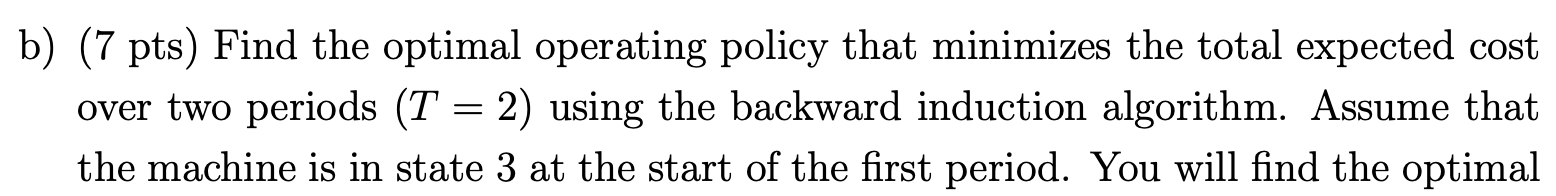

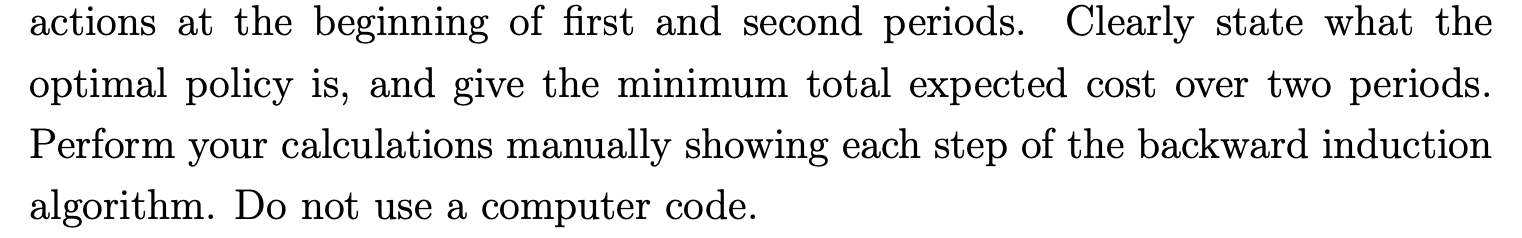

NOTE: I did not write a python fucntion to evaluate these, but I did write it up in LaTex. I hope this doesn't count as computer code...

Actions space: do nothing (N), or replace (R)

let v_n(s) be the min expected cost when there are n epoches to go until the end of the planning horizon starting in state s.

$$
\begin{align*}
\text{Initial Setup:}\\
& g = \{3, 5, 15\} \quad \text{(Operating costs for states 1, 2, and 3 respectively)} \\
& R = 20 \quad \text{(Replacement cost)} \\
& v_0 = \{2, 2, 2\} \quad \text{(Terminal costs)}\\

\text{Transition Probabilities:}\\
& P^N = \begin{bmatrix}
0.2 & 0.5 & 0.3 \\
0.0 & 0.4 & 0.6 \\
0.0 & 0.0 & 1.0 \\

\end{bmatrix} \quad \text{(Do Nothing)}\\
& P^R = \begin{bmatrix}
1 & 0 & 0 \\
1 & 0 & 0 \\
1 & 0 & 0 \\
\end{bmatrix} \quad \text{(Replace)}\\

\text{Backward Induction:}\\
n &= 1\\
v_1(1) &= \min\{g(1) + [0.2, 0.5, 0.3] \cdot v_0, R+g(1) + v_0(1)\} \\
& = \min\{3 + 0.2\cdot2 + 0.5\cdot2 + 0.3\cdot2, 23 + 2\} = 5\\
v_1(2) &= \min\{g(2) + [0.0, 0.4, 0.6] \cdot v_0, R+g(1) + v_0(1)\} \\
&= \min\{5 + 0.4\cdot2 + 0.6\cdot2, 23 + 2\} = 7\\
v_1(3) &= \min\{g(3) + [0.0, 0.0, 1.0] \cdot v_0, R+g(1) + v_0(1)\} \\
&= \min\{15 + 1.0\cdot2, 23 + 2\} = 17\\
\text{Actions at T=1:} & \quad \text{['N', 'N', 'N']}\\

n &= 2\\
v_2(1) &= \min\{g(1) + [0.2, 0.5, 0.3] \cdot v_1, R+g(1) + v_1(1)\} \\
&= \min\{3 + 0.2\cdot5 + 0.5\cdot7 + 0.3\cdot17, 23 + 5\} = 12.6\\
v_2(2) &= \min\{g(2) + [0.0, 0.4, 0.6] \cdot v_1, R+g(1) + v_1(1)\} \\
&= \min\{5 + 0.4\cdot7 + 0.6\cdot17, 23 + 5\} = 18\\
v_2(3) &= \min\{g(3) + [0.0, 0.0, 1.0] \cdot v_1, R+g(1) + v_1(1)\} \\
&= \min\{15 + 1.0\cdot17, 23 + 5\} = 28\\
\text{Actions at T=2:} & \quad \text{['N', 'N', 'R']}
\end{align*}
$$

Total expected cost is $v_2(3)=28$, given intial state is 3 and there are T=2 planning horizons. The ideal action would be to Replace, then do nothing. 